# Raices de Funciones Irracionales: Método de Newton-Raphson en $\mathbb{C}$


Encontrar las raíces de una ecuación, ha sido un tema de interés para las matématicas y aquellas disciplinas que la incorporan dentro de sus desarrollos, y el hecho de que teoremas como el de Abel-Ruffini y la teoría de Galois limiten la creación de fórmulas generales a polinomios menores de grado 5, ha llevado a la búsqueda y desarrollo de métodos númericos que puedan sobrepasar dichas dificultades, entre estos se encuentra el método desarrollado por Isaac Newton y refinado por Joseph Raphson. 

Este se define de la siguiente forma

<center>
$p = p_{n-1} - \frac{f(p_{n-1})}{f'(p_{n-1})}$
</center>

Para su implementación, comenzaremos definiendo las librerías necesarias

In [6]:
import sympy as sp
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

Se definen como variables simbólicas las variables a usar

In [7]:
x, z = sp.symbols('x z')

Luego crearemos una función base la cual nos devolverá el valor de la raíz, a partir del punto inicial

In [8]:
def metodo_newton_raphson(po,func,TOL,n_max=999):
    """
    Implementacion del metodo de newton-raphson para encontrar raices de una funcion
    
    Argumentos:
        - po -> Punto inicial para las iteraciones, se usara para evaluar en la funcion
        - func -> Funcion de interes
        - TOL -> Valor de la tolerancia del error, expresado de la forma 10**(-n), donde n es el valor de la precision
                deseada
        - n+max -> Numero maximo de iteraciones a seguir, su valor maximo por defecto es de 999   
        
    Retorna:
        - Tabla con las iteraciones, valores obtenidos y el error absoluto 
        - Raiz del polinomio obtenida, o False si no se encontro raiz
    
    """
    #Inicializacion de variables
    pn = 0
    i = 0
    
    #Creacion de funciones lambda para la evaluacion de los puntos
    f =  sp.lambdify(x,func,"numpy")
    df = sp.lambdify(x,sp.diff(func),"numpy") #Obtencion de la derivada de la funcion
    
    if df == 0:
        print(f"No es posible aplicar el método de Newton-Raphson debido a que la derivada de {func} es 0, lo que indefine el método")
        print("Por favor intente con otra función")
        return False
    
    #Creacion de la tabla que guardara los datos
    table = {
        "n":[],
        "po":[],
        "pn":[],
        "error":[]
    }
    
    
    def save_data(n,po,pn,error):
        """
        Funcion que guarda los datos de las iteraciones, en una tabla 
        
        Argumentos:
            - n -> Numero de la iteracion
            - po -> Punto inicial o anterior
            - pn -> Punto final o siguiente de la iteracion
            - error -> resultado de |b-a| ya computado
            
        Retorna:
            Nada
        
        """
        table["n"].append(n)
        table["po"].append(po)
        table["pn"].append(pn)
        table["error"].append(error)
       
    
    #Aplicacion del metodo, el bucle se recorre hasta que se encuentra un valor que cumpla con la Tolerancia estimada 
    # o se llegue al limite maximo de las iteraciones
    for i in range(n_max):
        pn =  po - (f(po)/df(po))
        error = abs(pn-po) 
        
        #condicion de salida exitosa
        if error < TOL:
            save_data(i,po,pn,error)
            return [ pn, table]
        
        save_data(i,po,pn,error)
        po = pn
        
        
        
    
    print("el metodo fallo")
    return False


Para efectos didácticos, el método estará modificado para retornar una tabla donde se muestren las iteraciones, el error absoluto y el valor. 

Demostración de uso:

In [9]:
f =  x**2-1

root, table = metodo_newton_raphson(10,f,10**(-8),1500)

df = pd.DataFrame(table)
display(df)
print(f"La raiz encontrada es {root}")

,n,po,pn,error
0,0,10.000000,5.050000,4.950000e+00
1,1,5.050000,2.624010,2.425990e+00
2,2,2.624010,1.502553,1.121457e+00
3,3,1.502553,1.084043,4.185095e-01
4,4,1.084043,1.003258,8.078562e-02
5,5,1.003258,1.000005,3.252562e-03
6,6,1.000005,1.000000,5.289550e-06
7,7,1.000000,1.000000,1.398970e-11


La raiz encontrada es 1.0


Gráficando la función, podemos corroborar que esta sería una de las raíces

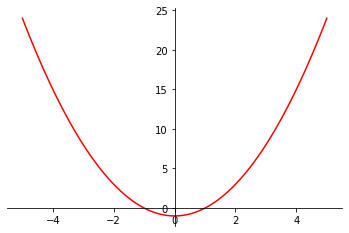

In [10]:
eje_x = np.linspace(-5,5,100)

# declaracion de la funcion
eje_y = eje_x**2-1

# Configurando los ejes en el centro
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(eje_x,eje_y, 'r')

# show the plot
plt.show()

Ahora bien, el teorema general del álgebra establece que todos los polinomios de grado n, tienen exactamente n raíces complejas, lo que implica que algunas funciones además de tener más de una raíz, pueden tener raíces dentro del conjunto de los números complejos

El método de Newton es capaz de adaptarse a estos nuevos requisitos, generando algunos cambios en su estructura, pero manteniendo su esencia.
Ahora bien, este paso al espacio de los números complejos genera patrones interesantes, "fractales", debido a que la raíz a la que los puntos iniciales se acercaran, no serán siempre el más cercano y la cantidad de iteraciones variará, así que modificaremos la función para poder ver dichos fractales 


Su implementación sería la siguiente:

**Nota: El código se ha divido para una mejor legibilidad**

In [22]:
def return_roots(zs, not_rooted):
    """
    Retorna las raices encontradas en un arreglo de coordenadas complejas
    Argumentos:
        - zs -> arreglo de coordenadas complejas 
        - not_rooted -> arreglo booleano que indica que posiciones no llegaron a una raiz  
    Retorna:
        - roots_arr -> arreglo con las raices encontradas
    """
    
    found_root = np.invert(not_rooted) #Se invierten los valores booleanos para determinar cuales valores 
    #de zs son raices
    zs = np.around(zs, 6) #Redondeo de los valores a una precision de 6 decimales

    # Creacion de un set, y posterior insercion de los valores que sean raices, si un valor ya se encuentra en el set
    # este no ingresara, dado que los set de python no permiten valores repetidos
    roots = set()
    for i in zs[found_root]:
        roots.add(i)

    roots_arr = list(roots)
    roots_arr.sort() #ordenamiento de raices
    return roots_arr

In [20]:
def nr_fractals(func,px,py,TOL,n_max,step=500):
    
    """
    Método de Newton Rhapson que obtiene las raices y el color domain de una función en los complejos, basado 
    en la rapidez con la que convergeran a una raiz, mayor claridad en el color significa mayor número de iteraciones
    
    Argumentos:
        -func -> función base
        -px -> máximo valor para x, será usado para calcular los limites positivos y negativos en el eje real
        -py ->  máximo valor para y, será usado para calcular los limites positivos y negativos en el eje imaginario
        -TOL -> tolerancia del error, usado para determinar que se ha encontrado una raiz satisfactoria
        -n_max -> cantidad máxima de iteraciones en las que se ejecutará el método
        - step -> distancia entre cada una de las coordenadas a evaluar en el arreglo, su valor por defecto es 500 
        
    Retorna:
        - arreglo con la cantidad de iteraciones que le toma a cada punto evaluado llegar a una raíz 
        - arreglo de n raíces encontradas
        - False en caso de que ocurra algun error
    
    
    """
    
    #Creacion de funciones lambda para la evaluacion de los puntos
    f = sp.lambdify(z,func,"numpy")
    df = sp.lambdify(z,sp.diff(func),"numpy") #Derivada de la función a emplear
    
    #Verificando que la funcion, al derivarla no se vuelva 0 e indefina el método
    if df == 0:
        print("La funcion se vuelve 0 al derivarla, el metodo no se puede aplicar")
        return False
    
    #Creación de arreglos de 1xstep de tamaño, con las coordenadas desde [-valor limite] 
    # hasta [valor limite] con una cantidad de divisiones igual a step, siendo inclusivo en el último valor
    ys, xs = np.ogrid[-py:py:step*1j, -px:px:step*1j]
    
    #Unión de ambos arreglos para crear una matriz de coordenadas complejas
    zs = xs + ys*1j
    
    #Creación de matriz de iteraciones, la cual esta populada del valor máximo de iteraciones
    iterations = n_max + np.zeros(zs.shape)
    not_rooted = iterations < 100000 #Creación de matriz de booleanos, que indica si aún no se encuentra una  raíz
    
    
    for i in range(n_max):
        
        
        previous_z = zs
        dev = (df(zs))
        np.place(dev,dev==0,1)
        
        
        #Método de Newton - Raphson, extendido a los complejos, aplicado a matrices de valores
        zs = zs - (f(zs))/ dev
       
        
        #Evaluando si se encontraron raices, basandose en la tolerancia y si el valor no habia sido encontrado
        roots = (abs(previous_z-zs)<TOL) & not_rooted
        #Sustiuyendo en el arreglo de iteraciones la cantidad de estas que tomo encontrar la raiz
        iterations[roots] = i
        
        #Creación de un nuevo arreglo booleano para determinar que valores siguen sin llegar a una raíz
        not_rooted = np.invert(roots) & not_rooted
    rts =  return_roots(zs, not_rooted)
    
    return [iterations,rts] 

Agreguemos además, una función que coloree la coordenada según hacia que raíz se dirigirá.
Y otra para gráficar el dominio de color de la función en general, es decir, el equivalente a su gráfica normal

In [33]:
def complex_newton(f, df, z0,TOL, n_max=1000):
    """
    Método de Newton-Raphson extendido a los complejos, aplicada a un solo valor en lugar de una matriz completa
    
    Argumentos:
        - f -> función de interés, ya lambdificada en términos de z
        - df -> derivada de la función de interés, ya lambdificada en términos de z
        
    Retorna:
        - False si no se encuentra una raíz luego de la cantidad máxima de iteraciones
        - La raíz a la que se aproximó el valor si la encuentra

    """

    pz = z0
    for i in range (n_max):
        dz = f(pz)/df(pz)
        if abs(dz) < TOL:
            return pz
        pz -= dz
    return False

def newton_colors(func, px ,py ,step, TOL=10**(-8)):
    """
    Función que genera una matriz que indica hacia que raiz se acerca cada uno de los valores dentro de las coordenadas
        
    Argumentos:
        -func -> función de interés, en términos de z
        -px -> máximo valor para x, será usado para calcular los limites positivos y negativos en el eje real
        -py ->  máximo valor para y, será usado para calcular los limites positivos y negativos en el eje imaginario
        -step -> distancia entre cada una de las coordenadas a evaluar en el arreglo, su valor por defecto es 500 
        -TOL -> tolerancia del error, usado para determinar que se ha encontrado una raiz satisfactoria, valor por defecto
                10^  (-8)
        
    Retorna:
        un arreglo con la raiz al que los valores complejos iniciales se aproximaran

    """

    roots = []
    aproximations = np.zeros((step, step))
    f = sp.lambdify(z,func,"numpy")
    df = sp.lambdify(z,sp.diff(func),"numpy")

    def get_root_index(roots, r):
        """
        Método que obtiene el indice de la raíz obtenida, si esta no existe dentro del arreglo de raices, la añade
        
        Argumentos: 
            - roots -> arreglo de raices
            - r -> raiz obtenida
            
        Retorna:
            - el indice de la raiz en el arreglo
            -tamaño del arreglo -1 si la raiz no existe dentro del arreglo

        """

        try:
            return np.where(np.isclose(roots, r, atol=TOL))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1

    
    for ix, x in enumerate(np.linspace(-px, px, step)):
        for iy, y in enumerate(np.linspace(-py, py, step)):
            z0 = x + y*1j
            r = complex_newton(f, df, z0,TOL)
            if r is not False:
                ir = get_root_index(roots, r)
                aproximations[iy, ix] = ir
                
                
    return aproximations

In [61]:
def color_domain(func,px,py,step=1000):
    """
    Método que genera una gráfica de la función compleja func, a través de su visualización mediante
    el dominio de color de la función
    
    Argumentos:
        -func -> función base
        -px -> máximo valor para x, será usado para calcular los limites positivos y negativos en el eje real
        -py ->  máximo valor para y, será usado para calcular los limites positivos y negativos en el eje imaginario
        -step -> distancia entre cada una de las coordenadas a evaluar en el arreglo, su valor por defecto es 1000 
        -cmap -> Mapa de colores a usar
    
    """
    f = sp.lambdify(z,func,"numpy")
    
    xs,ys = np.ogrid[-px:px:step*1j, -py:py:step*1j]

    return np.angle(f((xs - 1j*ys).T))
    

In [63]:
def grid(columns,rows,num_img,table, images,cmap):
    """
    Función que generá un grid con las imagenes solicitadas de la función en cuestion
    
    """
    
    
    df = pd.DataFrame(table, columns=["Raices"])
    display(df)

    fig = plt.figure(figsize=(12, 9))
    
    fig.add_subplot(rows, columns, 1)
    plt.scatter(np.real(table),np.imag(table),c=colors)
    plt.axis('on')
    
    fig.add_subplot(rows, columns, 2)
    plt.imshow(images[0], cmap=cmap)
    plt.axis("off")
   

    fig.add_subplot(rows, columns, 3)
    plt.imshow(images[1], cmap=cmap)
    plt.axis('off')
    
    
    fig.add_subplot(rows, columns, 4)
    plt.imshow(images[2], cmap=cmap)


Veamos como funcionará el método, con la función: $x^5-1$

,Raices
0,-0.809017-0.587785j
1,-0.809017+0.587785j
2,0.309017-0.951057j
3,0.309017+0.951057j
4,1.000000+0.000000j


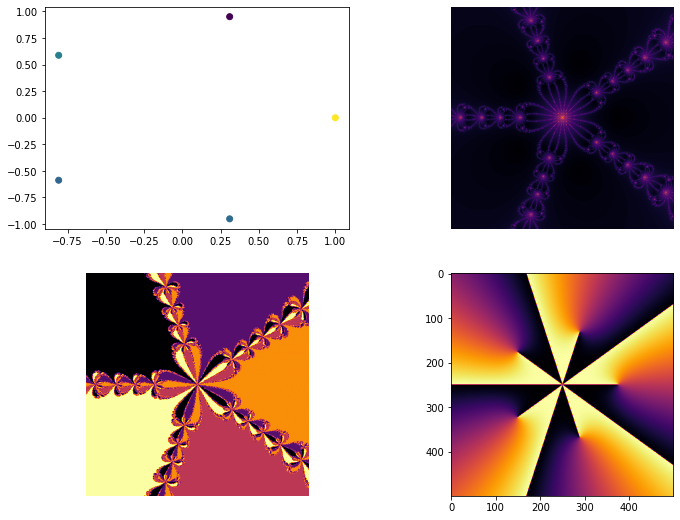

In [64]:
# Función de demostración
f = z**5-1

#Variables para guardar los datos
# Iterations -> Guarda la matriz de iteraciones
# roots -> Guarda las raíces para mostrarlas como una tabla 
# color_map -> Guarda los datos para la creación del mapa de color hacia la raíz a la que se dirigiran los puntos



iterations, roots= nr_fractals(f,2,2,10**(-12),135,500)
color_map = newton_colors(f,2,2,500,10**(-12)) 
graph = color_domain(f,2,2,500)

#Generador de colores aleatorios para los puntos obtenidos como raíces 
np.random.seed(19680801)
N = len(roots)
colors = np.random.rand(N)

images = [iterations, color_map,graph]

#Renderización de las gráficas y tablas

grid(2,2,4,roots, images,"inferno")

Como se puede observar, método mantiene su esencia de evaluar el punto anterior en la función y su derivada, encontrando una raíz para la función de interés. 
Así mismo, la implementación del método para encontrar valores complejos, tiene como efecto secundario el encontrar múltiples raíces, en este caso n, lo que satisface lo establecido por el teorema general del álgebra.

También, se ha podido observar este patrón de fractales, que segeneran en el espacio complejo, los cuales generan set muy similares a los de Mandelbrot, de los que se puede [leer más aquí](gaussianos.com/¿que-es-el-conjunto-de-mandelbrot-historia-y-construccion/)
Y puede verse un [zoom de los set de Mandelbrot aqui](https://www.youtube.com/watch?v=b005iHf8Z3g)

Probemos ahora el método con funciones más complicadas

,Raices
0,-0.970639-1.005808j
1,-0.970639+1.005808j
2,2.470639-4.640533j
3,2.470639+4.640533j


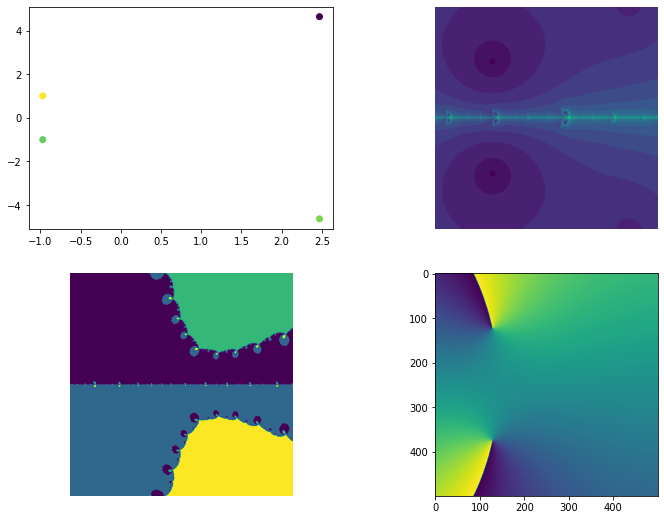

In [66]:
# Función de demostración
f = z**4 - 3*z**3 + 20*z**2 + 44*z + 54

#Variables para guardar los datos
# Iterations -> Guarda la matriz de iteraciones
# roots -> Guarda las raíces para mostrarlas como una tabla 
# color_map -> Guarda los datos para la creación del mapa de color hacia la raíz a la que se dirigiran los puntos



iterations, roots= nr_fractals(f,2,2,10**(-12),135,500)
color_map = newton_colors(f,10,10,500,10**(-12)) 
graph = color_domain(f,2,2,500)

#Generador de colores aleatorios para los puntos obtenidos como raíces 
np.random.seed(19680801)
N = len(roots)
colors = np.random.rand(N)

images = [iterations, color_map,graph]

#Renderización de las gráficas y tablas

grid(2,2,4,roots, images,"viridis")

,Raices
0,-1.800005+0.000000j
1,0.798855-0.875220j
2,0.798855+0.875220j


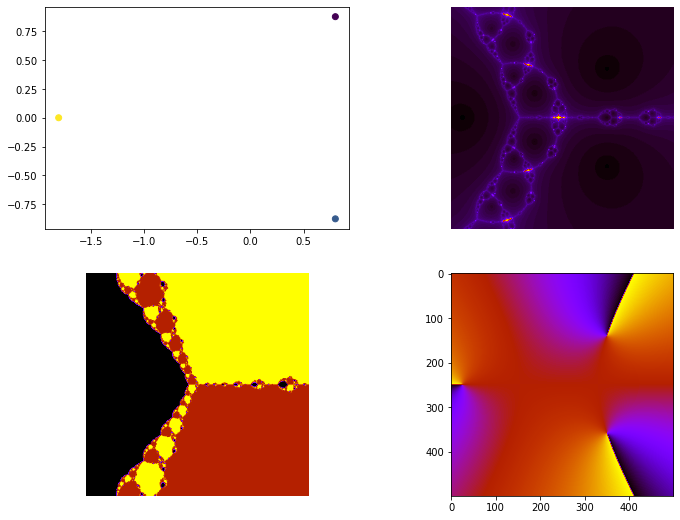

In [79]:
# Función de demostración
f = 0.7846*z**3 + 0.158721*z**2-1.1547*z+1.9831

#Variables para guardar los datos
# Iterations -> Guarda la matriz de iteraciones
# roots -> Guarda las raíces para mostrarlas como una tabla 
# color_map -> Guarda los datos para la creación del mapa de color hacia la raíz a la que se dirigiran los puntos



iterations, roots= nr_fractals(f,2,2,10**(-12),135,500)
color_map = newton_colors(f,10,10,500,10**(-12)) 
graph = color_domain(f,2,2,500)

#Generador de colores aleatorios para los puntos obtenidos como raíces 
np.random.seed()
N = len(roots)
colors = np.random.rand(N)

images = [iterations, color_map,graph]

#Renderización de las gráficas y tablas

grid(2,2,4,roots, images,"gnuplot")

,Raices
0,-0.949064+0.000000j
1,-0.911099-0.470035j
2,-0.911099+0.470035j
3,-0.159796-1.094482j
4,-0.159796+1.094482j
5,0.680458-1.019390j
6,0.680458+1.019390j
7,0.864968-0.243331j
8,0.864968+0.243331j


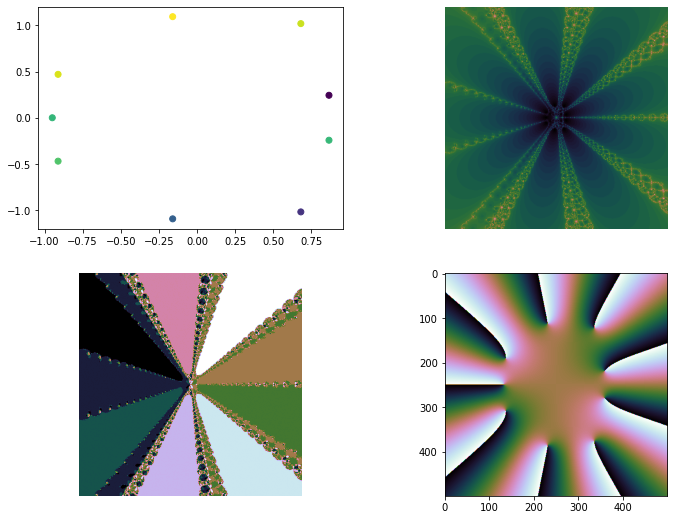

In [82]:
# Función de demostración
f = 10.13448*z**9 + 8.93468*z**6-16.8734*z**2+15

#Variables para guardar los datos
# Iterations -> Guarda la matriz de iteraciones
# roots -> Guarda las raíces para mostrarlas como una tabla 
# color_map -> Guarda los datos para la creación del mapa de color hacia la raíz a la que se dirigiran los puntos



iterations, roots= nr_fractals(f,10,10,10**(-12),135,500)
color_map = newton_colors(f,10,10,500,10**(-12)) 
graph = color_domain(f,2,2,500)

#Generador de colores aleatorios para los puntos obtenidos como raíces 
np.random.seed()
N = len(roots)
colors = np.random.rand(N)

images = [iterations, color_map,graph]

#Renderización de las gráficas y tablas

grid(2,2,4,roots, images,"cubehelix")

Siguiente función a probar será $ ( z^2 + 25 z )^{(1/2)} - 4z^3 $

-4*z**3 + sqrt(z**2 + 25*z)


,Raices
0,-0.881620-0.633487j
1,-0.881620+0.633487j
2,1.102843+0.000000j


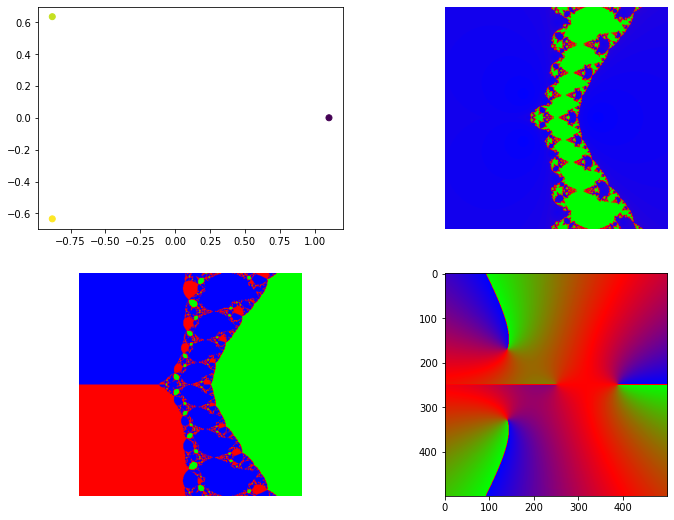

In [87]:
# Función de demostración
f = sp.sqrt(z**2+25*z)-4*z**3
print(f)
#Variables para guardar los datos
# Iterations -> Guarda la matriz de iteraciones
# roots -> Guarda las raíces para mostrarlas como una tabla 
# color_map -> Guarda los datos para la creación del mapa de color hacia la raíz a la que se dirigiran los puntos



iterations, roots= nr_fractals(f,3,3,10**(-12),135,500)
color_map = newton_colors(f,3,3,500,10**(-12)) 
graph = color_domain(f,2,2,500)

#Generador de colores aleatorios para los puntos obtenidos como raíces 
np.random.seed()
N = len(roots)
colors = np.random.rand(N)

images = [iterations, color_map,graph]

#Renderización de las gráficas y tablas

grid(2,2,4,roots, images,"brg")

Como pudó observarse en los ejemplos anteriores, el método es capaz de encontrar las raíces y fractales de las funciones ingresadas, con la precisión deseada, junto con su dominio de colores, incluso en aquellas funciones que son irracionales